In [2]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

local


<Axes: >

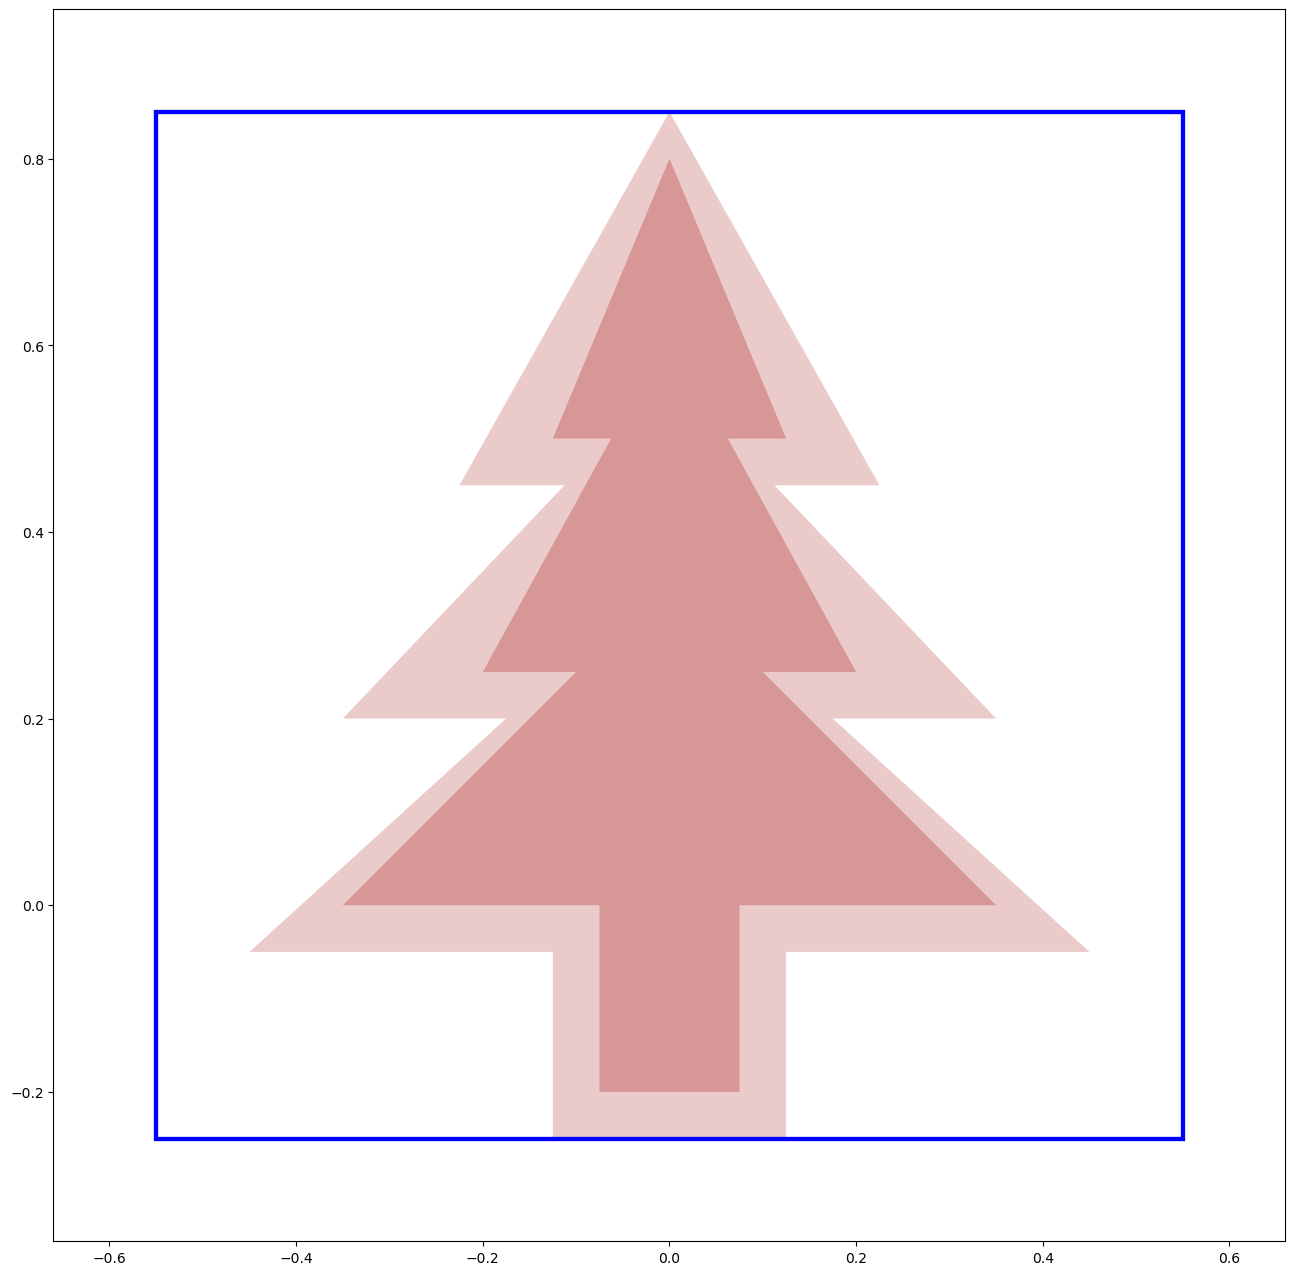

In [10]:
importlib.reload(kgs)
sol = kgs.SolutionCollectionSquare()
sol.xyt = [[[0.,kgs.tree_centroid_offset[1],0.]]]
sol.h = [[1.1,0.,0.3]]
plt.figure(figsize=(16,16))
ax = plt.gca()
pack_vis_sol.pack_vis_sol(sol, ax=ax)
kgs.TREE_EXPANSION = 0.05
kgs.initialize_tree_globals()
sol.xyt = [[[0.,kgs.tree_centroid_offset[1],0.]]]
pack_vis_sol.pack_vis_sol(sol, ax=ax, alpha=0.5)

In [ ]:
tree_list.xyt = [[1.8,0.9,1.1],[1.7,1.2,1.5]]
%timeit pack_cuda.overlap_two_trees(cp.array(tree_list.xyt[0]),cp.array(tree_list.xyt[1]))
tree_list = pack_basics.place_random(150, 2)
%timeit pack_cuda.overlap_list_total(cp.array(tree_list.xyt))

271 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
411 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(array(0.286659),
 array([[ 0.15806603,  0.34383132,  0.00172859],
        [ 0.        ,  0.        ,  0.        ],
        [-0.6089821 ,  0.03064272, -0.10929808],
        [ 0.04063005, -0.08045903, -0.04490508],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.24018481, -0.2892124 ,  0.00323281],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.0411781 , -0.16697189, -0.06198251],
        [ 0.12892311,  0.16216927, -0.02711684]]))

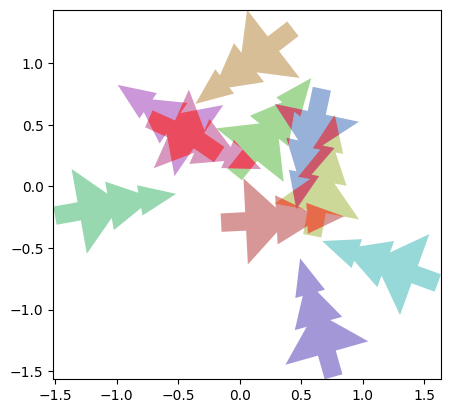

In [ ]:
import pack_basics
import pack_vis
importlib.reload(pack_basics)
importlib.reload(pack_vis)
tree_list = pack_basics.place_random(10, 2)
#tree_list.xyt = [[0.,0.,0.]]
pack_vis.visualize_tree_list(tree_list)
import pack_cost
importlib.reload(pack_cost)
cost = pack_cost.PackingCost()
cost.collision_cost = pack_cost.CollisionCostOverlappingArea()
total_cost, total_grad = cost.compute_total_cost_ref(cp.array(tree_list.xyt), include_gradients=True)
total_cost, total_grad